In [1]:
from tge import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'

In [2]:
dish_d = 13.5
freq = 1.227e9
f = 0.8
sigma_n = 1e-2

N_side = 256
N_grid = 100
N_vis = 10_000

uv_spread = 1e3
N_fwhm = 2.5

tge = TGE(dish_d, freq, f, N_grid)

I, lm = simulate_sky(N_side, N_fwhm*tge.thetaFWHM, Cl=Cl, beam=airy, B_args={"D": dish_d, "freq": freq})
dOmega  = np.diff(lm[:,0])[0]**2

uv = random_uv(N_vis, uv_spread)
V = calc_vis(I.flatten()*tge.dBdT, lm, uv, sigma_n, seed=123)

/nfs/chris/projects/tabascal/TGEpy/tge.py:149: RuntimeWarning: divide by zero encountered in divide
  return np.where(l == 0, 0, A * (1000 / np.abs(l)) ** beta)
/nfs/chris/projects/tabascal/TGEpy/tge.py:177: RuntimeWarning: invalid value encountered in divide
  return np.where(theta == 0, 1, (2 * jv(1, x) / x) ** 2)


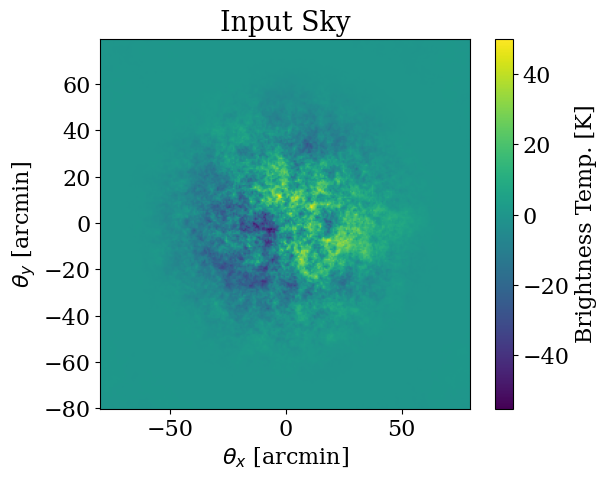

In [6]:
extent = np.rad2deg([lm[:,0].min(), lm[:,0].max(), lm[:,1].min(), lm[:,1].max()])*60
plt.imshow(I/dOmega, origin="lower", extent=extent)
plt.title("Input Sky")
plt.xlabel(r"$\theta_x$ [arcmin]")
plt.ylabel(r"$\theta_y$ [arcmin]")
plt.colorbar(label="Brightness Temp. [K]")

In [4]:
l_b, Cl_b_norm, d_Cl_b_norm = tge.estimate_Cl(uv, V, sigma_n, regrid=True)

l = np.logspace(np.log10(l_b.min()/2), np.log10(l_b.max()*2))
norm = l * (l+1) / (2*np.pi)
C_l_norm = norm*Cl(l)

(100.0, 10000.0)

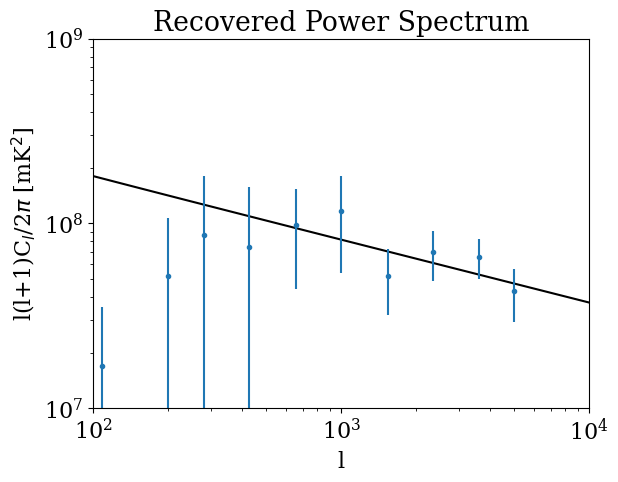

In [5]:
plt.loglog(l, C_l_norm*1e6, 'k', label="$C_l$")
plt.errorbar(l_b, Cl_b_norm*1e6, yerr=d_Cl_b_norm*1e6, fmt='.')

plt.title("Recovered Power Spectrum")
plt.xlabel("l")
plt.ylabel("l(l+1)C$_l$/2$\\pi$ [mK$^2$]")
plt.ylim(1e7, 1e9)
plt.xlim(1e2, 1e4)